# More equation solving examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

### Lagrange multipliers
In calc 3 you may have seen the method of Lagrange multipliers to solve constrained optimization problems in many variables. 

**Example** Consider making the box with the largest volume when you only have 64 square inches of material. What are the optimal box dimensions?

Let $,x,y,z$ be the box dimensions in inches. Then we want to maximize $V = xyz$ subject to $2xy + 2xz + 2yz = 64$ or $g(x,y,z) = xy + xz + yz = 32$.

If we let $\lambda$ be a Lagrange multiplier then we need to solve
$$\nabla V = \lambda \nabla g,$$
$$g(x,y,z) = 32.$$

This yields the system of equations

$$yz = \lambda (y + z)$$
$$xz = \lambda (x + z)$$
$$xy = \lambda (x + y)$$
$$xy + xz + yz = 32$$

We could go through the algebra to solve these four equations in the four unknowns, but we can use python too.

In [2]:
def lag(vec):
    x,y,z,lam = vec[0],vec[1],vec[2], vec[3]  #unpack vector
    #output needs to be a four-vector too
    output=np.array([
        y*z - lam*(y+z),
        x*z - lam*(x+z),
        x*y - lam*(x+y),
        x*y+x*z+y*z -32
    ])
    return(output)

opt = fsolve(lag,[3.,3.,3.,3.])
print(opt)

[3.26598632 3.26598632 3.26598632 1.63299316]


### Example
Set up and solve the following system of equations.
$$0 = 3x(5-x) - xy$$
$$0 = 2y(10-y) - 3xy$$

In [6]:
def sys(vec):
    x,y = vec[0],vec[1] #unpack vector input
    output = np.array([
        3*x*(5-x) - x*y,
        2*y*(10.-y) - 3.*x*y
    ])
    return(output)

sol = fsolve(sys,[4,4.])

print(sol)

[3.33333333 5.        ]


### Equations of State
Many equations of state in chemistry and physics have been developed to describe the relationship between the pressure, volume, and temperature of gases. One such equation is the Beattie-Bridgeman equation,
$$P = \frac{RT}{V} + \frac{\beta}{V^2} + \frac{\gamma}{V^3} + \frac{\delta}{V^4},$$
where $P$ is pressure, $V$ is molar volume, $T$ is temperature, $R$ is the ideal gas constant.
The second, third, and fourth terms in the equation above may be viewed as corrections to the ideal gas law $\displaystyle PV = RT$. The parameters $\beta, \gamma,$ and $\delta$ are defined as
$$\beta = RTB_0 - A_0 - \frac{Rc}{T^2},$$
$$\gamma = -RT B_0 b + A_0 a - \frac{RcB_0}{T^2},$$
$$\delta = \frac{RB_0bc}{T^2}.$$
$A_0,B_0,a,b,$ and $c$ are constants that vary from gas to gas. In this exercise we will find the volumes that correspond to certain pressures and temperature for methane. 

Complete the tasks below.
- Write a code cell that uses fsolve to solve the Beattie-Bridgeman equation for volume given the pressure and temperature. The values of the constants are $$A_0=2.2769, B_0=0.05587, a=0.01855, b=0.01587, c=12.83\times10^4, R = 8.2057366\times10^{-5}.$$
- For temperature of 200 degrees, calculate the volumes for pressures from 1 to 200 atm. (Note you can make an array of pressures and loop over this array.
- Make a plot of volumes versus pressures. Make sure to label your axes.

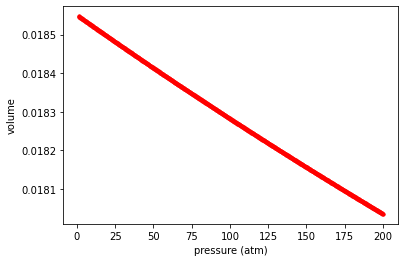

In [14]:
R = 8.2057366E-5
A=2.2769
B=0.05587
a=0.01855
b=0.01587
c=12.83E4

def BB(V,P,T):
    #YOUR CODE
    beta = R*T*B-A-R*c/T**2
    gamma = -R*T*B*b + A*a -R*c*B/T**2
    delta = R*B*b*c/T**2
    
    output = P- R*T/V - beta/V**2 - gamma/V**3 - delta/V**4
    return(output)

    

T = 200
PS = np.linspace(1,200,1001)
vol = np.copy(PS)

for i in range(0,len(PS)):
    P = PS[i]
    Vinit = R*T/P
    vol[i] = fsolve(BB,Vinit,args=(P,T))

plt.plot(PS,vol,'r.');
plt.xlabel('pressure (atm)');
plt.ylabel('volume');